# Foreign Investment, Trade, and Growth in the European Union: An RDD Analysis


Alessandra Guerrero-Rangosch

## Research Question

***Does the annexation of a country into the European Union improve foreign direct investment flows and trade in the annexed country?***

We attempt to answer this question with publicly available foreign direct investment data from the World Bank on a number of economic outcome variables using event studies in the form of a Regression Discontinuity Design.

## Motivation

### The Purpose of Economic and Monetary Unions

The European Union in its current form was founded in 1991, but its origins go back to the 1950s when the European Coal and Steel Community (ECSC) united European countries economically and politically in order to ensure peace. In 1957, the Treaty of Rome formed the European Economic Community (EEC) with its initial aim to bring economic integration, including a common market and customs union. When the European Union was created in 1993, the EEC’s institutions were directly absorbed by the EU. Upon the formation of the EU, a complete single market was achieved which allowed for free movement of goods, capital, services and people. Through a standardized system of laws that apply in all member states, legislation in justice and home affairs is enacted and common policies on trade and agriculture are maintained. The Schengen Area even allows for free travel for the population of member states. In 1999, a monetary union was established, which composes 19 EU member states that use the Euro currency.

The European Union has benefited its citizens by striving for peace and prosperity since 1957 to help protect our basic political, social and economic rights. The single market principle in the EU is the world’s most highly developed and open marketplace. Because of the integrated cooperation between EU countries, the food and environment meet some of the world’s highest quality standards. Furthermore, EU countries acting in unison have much more of a voice on the world stage than 27 small and medium-sized nations acting separately.

### Do Economic Unions Promote Trade and Foreign Investment?

The second half of the twentieth century has been characterized by an unprecedented progress in both global and regional economic integration. The development of the European Union’s internal and external economic relationships contributed greatly to the world’s view of economic integration. To evaluate the consequences of economic integration, new EU-member states can be studied. [Badinger (2005) ](https://link.springer.com/article/10.1007%2Fs10290-005-0015-ystudied) permanent and temporary growth effects using a panel of fifteen EU member states over the period 1950-2000. The results suggest sizeable effects: GDP per capita of the EU would be approximately one-fifth lower today if no integration had taken place since 1950.

Although former studies suggest significant effects of economic integration on GDP per capita ([Kallioras & Petrakos, 2009](https://link.springer.com/article/10.1007%2Fs00168-009-0296-5); Badinger, 2005), there is limited research where event studies are utilized to quantify and suggest the benefits of joining an economic union like the EU. Using data from the World Bank, this short study will examine the (economic) benefits for both new EU member-states as well as former EU member-states.


## Data & Methodology

### Data: Sources and Variables of Interest

To properly assess the relationship between annexation and economic consequences for EU countries, enough relevant data is required. The data that was used in this study was acquired from the World Bank (formally [the World Bank Development Indicators](https://datacatalog.worldbank.org/dataset/world-development-indicators)), as the available data is both reliable and relevant. In our data, we have information on 27 countries, each with observations for the years 1971-2019. Besides year of entry in the EU, we use four numerical variables to quantify economic health of the given country. Foreign direct investments (FDI), in- and outflows are included as it has been assumed that FDI is an important factor of economic growth. This can be explained by the reasoning that investment is the dynamic element of GDP, causing GDP growth. Trade as a percentage of GDP is also included, as trade increases competition and lowers world prices, providing benefits to consumers by raising the purchasing power of their own income, consequentially leasing to a rise in consumer surplus. It therefore is an important factor in economic growth. Finally, Gross fixed capital formation (GFCF as a % of GDP, also called investment) is included, as investments increase both aggregate demand and future productive capacity, therefore indicating the fostering of economic growth.

### Methodology: Proposed Econometric Method

1. We begin by importing our data and performing some basic visual analysis on the termporal trends of our variables of interest on our sample of countries which joined the European Union in 2004.
2. Then, we will then perform an Regression Discontinuity Design (RDD) analysis on our sample of EU countries which joined in 2004 to find if joining the EU had significant effects on our 4 variables of interest, one regression for each country and each variable of interest (FDI inflows, FDI outflows, trade, and gross fixed capital formation).
3. The model estimate derivation from above will be accompanied by a series of plots which visually describe the treatment effect at the cut-off point of 2004. These RDD plots will demonstrate the kink signifying the discontinuity in the data.
4. Lastly, we will verify our results using more robust RDD methods -utilizing a use-written Python RDD program-, and complete a sensitivity analysis using a placebo test to see if a change in threshold returns similar treatment effects.



## Answers

According to our results and the sensitivity analysis, we cannot say that there is a consistent treatment effect of joining the EU in 2004 on immediate and temporary changes in FDI inflows, FDI outflows, trade, and GFCF. The estimated treatment effects vary country to country, but our country-specific analysis demonstrate that there is a potential source of study of the effects of joining the EU for countries with similar economic similarities and productive capacities as Cyprus and Malta.

However, we find that the threshold of the year 2004 (the date of joining the EU) is significant, as our sensitivity analysis demonstrates that even choosing the years after the financial crisis do not have statistically significant treatment effects on our variables of interest.

### Assumptions and Limitations

As described above, a regression discontinuity design analysis was performed to find if joining an economic union has significant facts on economic outcomes for the annexed countries. For the feasibility of this study, an RDD study was performed only on a subsample of countries that joined the European Union in 2004. To account for possible bias, a sensitivity analysis will be performed using an arbitrary threshold (for example, using a placebo such that the country joined in 2009 instead of 2004).

Furthermore, for the scope of this study it was decided to focus on examining the importance on four indicators of economic health: trade, foreign direct investment inflows, foreign direct investment outflows and gross fixed capital formation, all as a percentage of GDP. For further research, a broader sample of countries and predictive factors could be included.

Finally, the focus on high-income or upper-high-income countries within Europe can be considered another limitation. In further research, a broader sample of range in countries’ income could be gathered, to create a more generalizable model.


## Results & Code

### Preparation

We first begin by importing our necessary packages.

In [ ]:
# Importing packages
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pymc3 as pm
from matplotlib import style
import copy
import xlrd
import os
import io
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns

# Setting the plotting style
%matplotlib inline
style.use("fivethirtyeight")

Then, we upload and import our Worldbank macroeconomic development indicator dataset, as described in our Data section.

In [ ]:
# Uploading data into the project environment
# Our dataset it called worldbank_indicators_V3.xlsx
from google.colab import files
uploaded = files.upload()

Saving worldbank_indicators_V3.xlsx to worldbank_indicators_V3 (5).xlsx


In [ ]:
# Importing the data
wbdata = pd.read_excel(uploaded['worldbank_indicators_V3.xlsx'])

### Descriptive Statistics

The first and last 5 rows of our dataset is visible below, so this gives us an idea of what our data looks like.

We have 1323 total observations and 7 columns. There are 27 countries total in the European Union, and all are included in our data set. Each country contains 47 observations for the given development indicators for the years from 1971 to 2019. We utilize 4 different numerical variables - **trade**, **fdi_outflows**, **fdi_inflows**, and **gfcf**- and an additional numerical variable which specifies the year of entry of a country into the EU.

As will be clearer later, we will be focusing our analysis on countries that entered the EU in 2004.

In [ ]:
# We can look at several observations of our dataset
wbdata

,country,year,trade,fdi_outflows,fdi_inflows,gfcf,enter
0,Austria,1971,54.4,0.2,0.8,29.3,1995
1,Austria,1972,54.3,0.2,0.7,31.8,1995
2,Austria,1973,54.5,0.1,0.5,30.0,1995
3,Austria,1974,59.6,0.1,0.5,29.9,1995
4,Austria,1975,56.6,0.1,0.2,28.1,1995
...,...,...,...,...,...,...,...
1318,Sweden,2015,83.7,3.0,2.0,23.8,1995
1319,Sweden,2016,82.3,0.2,3.0,24.2,1995
1320,Sweden,2017,84.9,7.0,4.9,25.1,1995
1321,Sweden,2018,89.1,1.8,-0.4,25.2,1995


We follow up with some standard descriptive statistics of our data. We can ignore the **year** and **enter** variables, since they only represent dates in years.

In [ ]:
# Here we have descriptive statistics
# Counts, mean, standard deviation, the minimum, the quartiles, and the maximum
wbdata.describe()

,year,trade,fdi_outflows,fdi_inflows,gfcf,enter
count,1323.000000,1096.000000,1031.000000,1065.000000,1096.000000,1323.000000
mean,1995.000000,99.583810,5.079580,7.045620,23.151141,1988.851852
std,14.147483,58.492758,24.527383,28.193545,4.152959,19.195801
min,1971.000000,23.300000,-87.200000,-58.300000,1.157355,1958.000000
25%,1983.000000,58.200000,0.100000,0.600000,20.600000,1973.000000
50%,1995.000000,85.200000,0.800000,1.900000,22.700000,1995.000000
75%,2007.000000,125.225000,2.900000,4.600000,25.300000,2004.000000
max,2019.000000,408.400000,301.200000,449.100000,43.400000,2013.000000



### Temporal Changes in Economic Outcomes




It is important to note that, unlike typical time-series data analysis, we will keep our **year** and **enter** variables as numeric instead of transforming them into a date-time format. Our basic visual analysis in this section will not be affected, and additionally the RDD analysis functions best with a numeric runnning variable (especifically, it does not run with a date-time variable with cross-sectional data). Since our running variable **year** will be centered at the cut-off **enter** date, we do not require our time data to be in date-time format.


As stated before, we will be focusing on the countries that  To see how these development indicators vary over time for the EU countries, we can plot these various indicators for each country from 1971 to 2020.

We will create a separate dataframe for these countries during our RDD analysis. They will include Cyprus, the Czech Republic, Estonia, Hungary, Latvia, Lithuania, Malta, Poland, Slovakia, and Slovenia.



In [ ]:
# Creating separate dataframe for countries that entered the EU in 2004
wbdata_2004 = wbdata[(wbdata['enter'] == 2004)]

The following series of four plots describe visually FDI inflows, FDI outflows, trade, and gross fixed capital formation, respectively.



---

**FDI Inflows (% of GDP)**

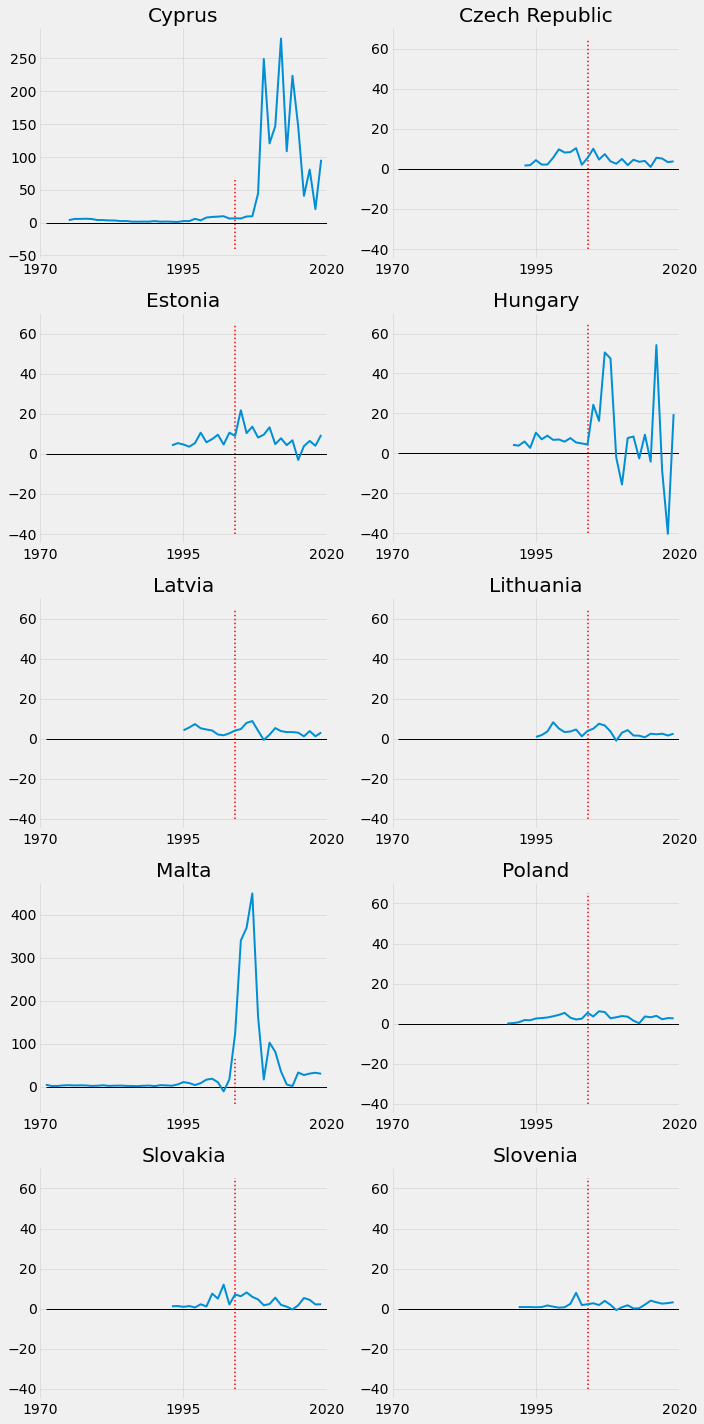

In [ ]:
# Here we set up the environment for the 10 plots
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False, figsize=(10,20))
axes_list = [item for sublist in axes for item in sublist]

# We plot the FDI inflows for every country that entered the EU in 2004
for countryname, selection in wbdata_2004.head(1200).groupby("country"):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='fdi_inflows', label=countryname, ax=ax, legend=False, clip_on=False, linewidth=2)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.5)
    ax.set_xlim((1970, 2020))
    ax.set_xlabel("")
    ax.set_xticks(range(1970, 2021, 25))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.vlines(x=2004, ymin=-40, ymax=65, color='red', ls= ':', lw=1.5) # We create the line indicating the cut-off of 2004
    ax.hlines(y=0, xmin=1971, xmax=2020, color='black', lw=1) # And lines to indicate FDI inflow of 0

for ax in axes_list:
    ax.remove()

# And plot all 10 graphs into one figure
plt.tight_layout()

In the above plots, we can see one of two outcomes in the FDI inflows after the cut-off date of 2004: relative stability or a marked short-run increase lasting between 1 and 5 years. Using time-series line plots such as these make general trends difficult to tell given the regular fluctuations of these macroeconomic variables. This will be the case for the following plots as well. There are several countries that saw explosive increases in FDI inflows in the periods directly after 2004, and some that remained stable.



---

**FDI Outflows (% of GDP)**

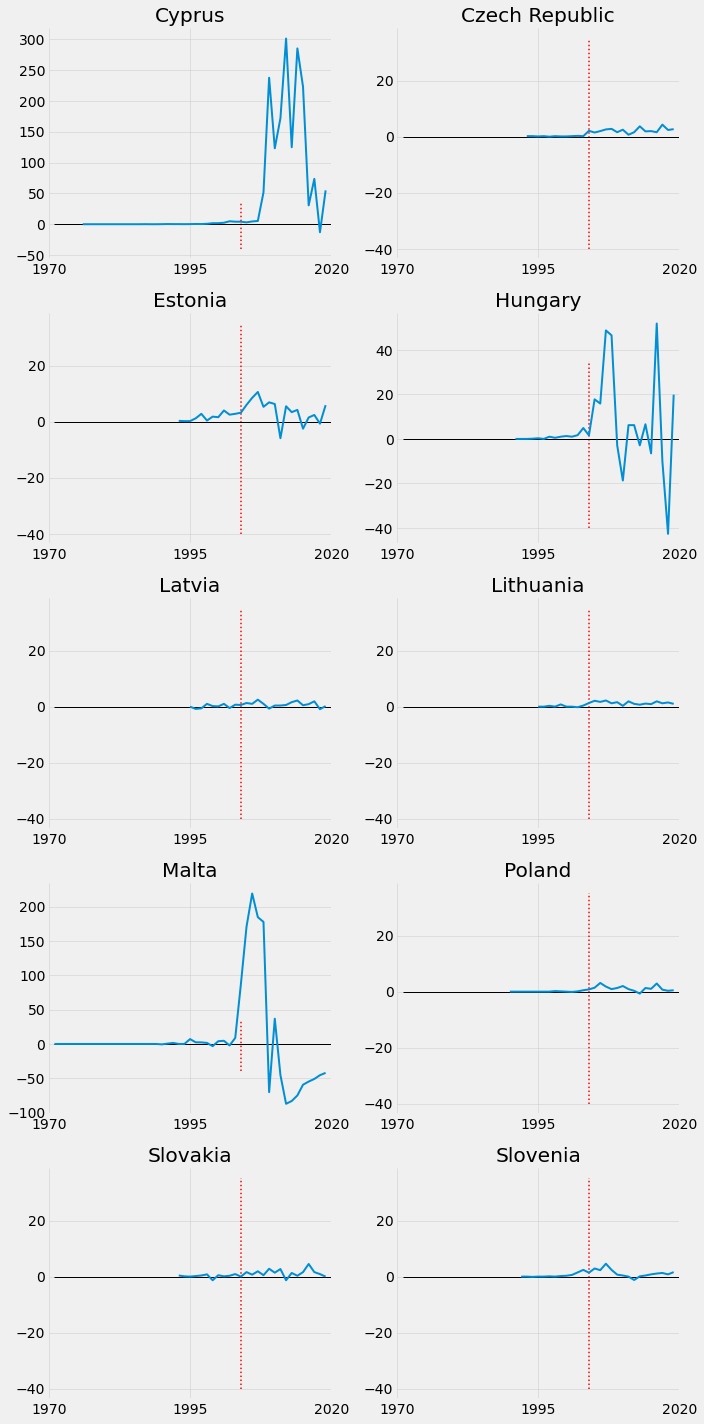

In [ ]:
# Utilizing the same commands as before
# We plot the FDI outflows for every country that entered the EU in 2004
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False, figsize=(10,20))
axes_list = [item for sublist in axes for item in sublist]

for countryname, selection in wbdata_2004.head(1200).groupby("country"):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='fdi_outflows', label=countryname, ax=ax, legend=False, clip_on=False, linewidth=2)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.5)
    ax.set_xlim((1970, 2020))
    ax.set_xlabel("")
    ax.set_xticks(range(1970, 2021, 25))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.vlines(x=2004, ymin=-40, ymax=35, color='red', ls= ':', lw=1.5)
    ax.hlines(y=0, xmin=1971, xmax=2020, color='black', lw=1)

for ax in axes_list:
    ax.remove()

plt.tight_layout()

In this set of plots, we can see the FDI outflows. For some countries, the trend is more visible compared to others. In Malta, for example, FDI outflows as a percentage of GDP increase steadily, starting in 2003 until 2006. The announcement of joining the EU seemingly boosts FDI outflows. However, the FDI outflows crash in the period 2007-2009, potentially as a consequence of the financial crisis. For some countries, FDI outflow as a percentage of GDP scores are relatively more stable over time.  



---
**Trade (% of GDP)**



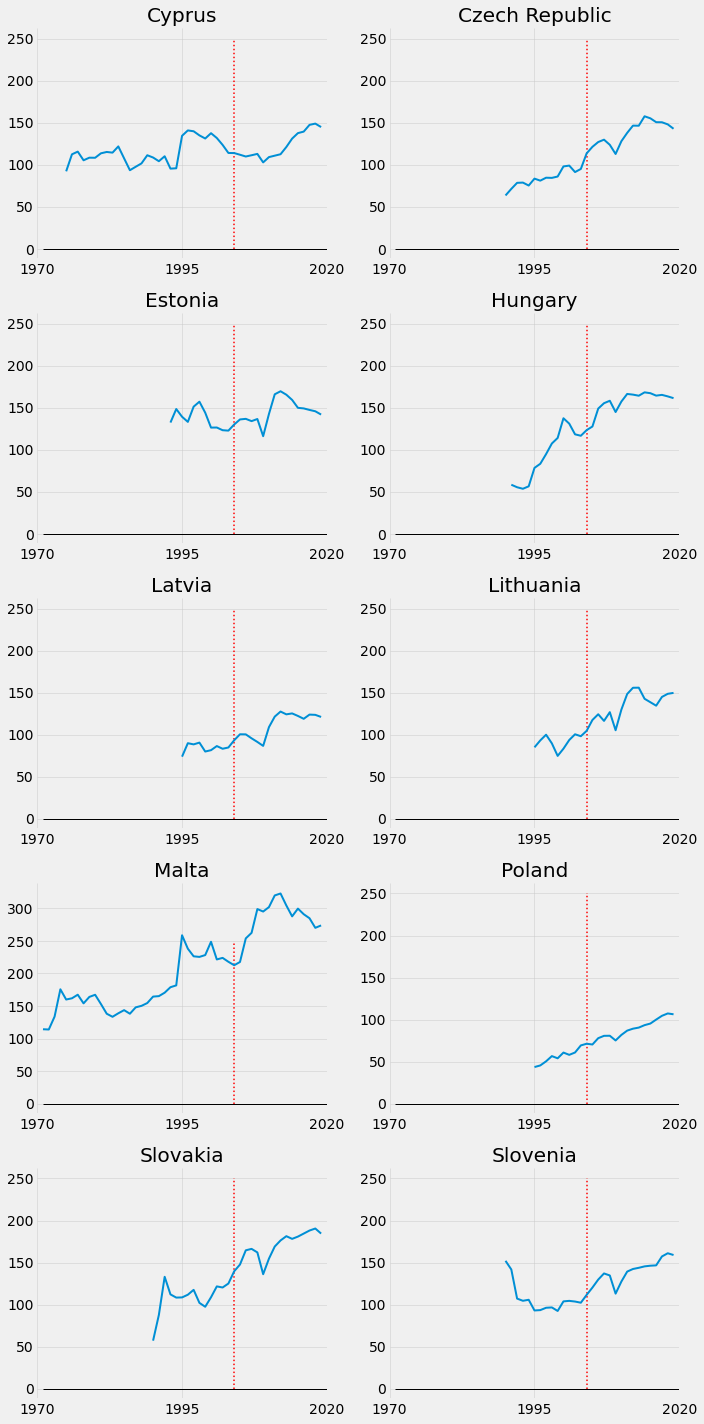

In [ ]:
# Utilizing the same commands as before
# We plot trade for every country that entered the EU in 2004
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False, figsize=(10,20))
axes_list = [item for sublist in axes for item in sublist]

for countryname, selection in wbdata_2004.head(1200).groupby("country"):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='trade', label=countryname, ax=ax, legend=False, clip_on=False, linewidth=2)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.5)
    ax.set_xlim((1970, 2020))
    ax.set_xlabel("")
    ax.set_xticks(range(1970, 2021, 25))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.vlines(x=2004, ymin=0, ymax=250, color='red', ls= ':', lw=1.5)
    ax.hlines(y=0, xmin=1971, xmax=2020, color='black', lw=1)

for ax in axes_list:
    ax.remove()

plt.tight_layout()

In the above set of plots, we can see a visual and steady increase in trade as a percentage of GDP over time. One of the causes is increased globalization over the past few decades due to globalization worldwide trade has vastly grown. Furthermore, we can see a growth after joining the EU in 2004, indicated by the red line. One of the benefits of joining an economic union is the increased trading potential. The consequences of this are visible in the graphs, as trade increases even more in the years immediately after 2004. For almost all countries, there is a slight deviation in this growing trend, which can be explained by the financial crisis in 2007-2008.



---
**Gross Fixed Capital Formation (% of GDP)**


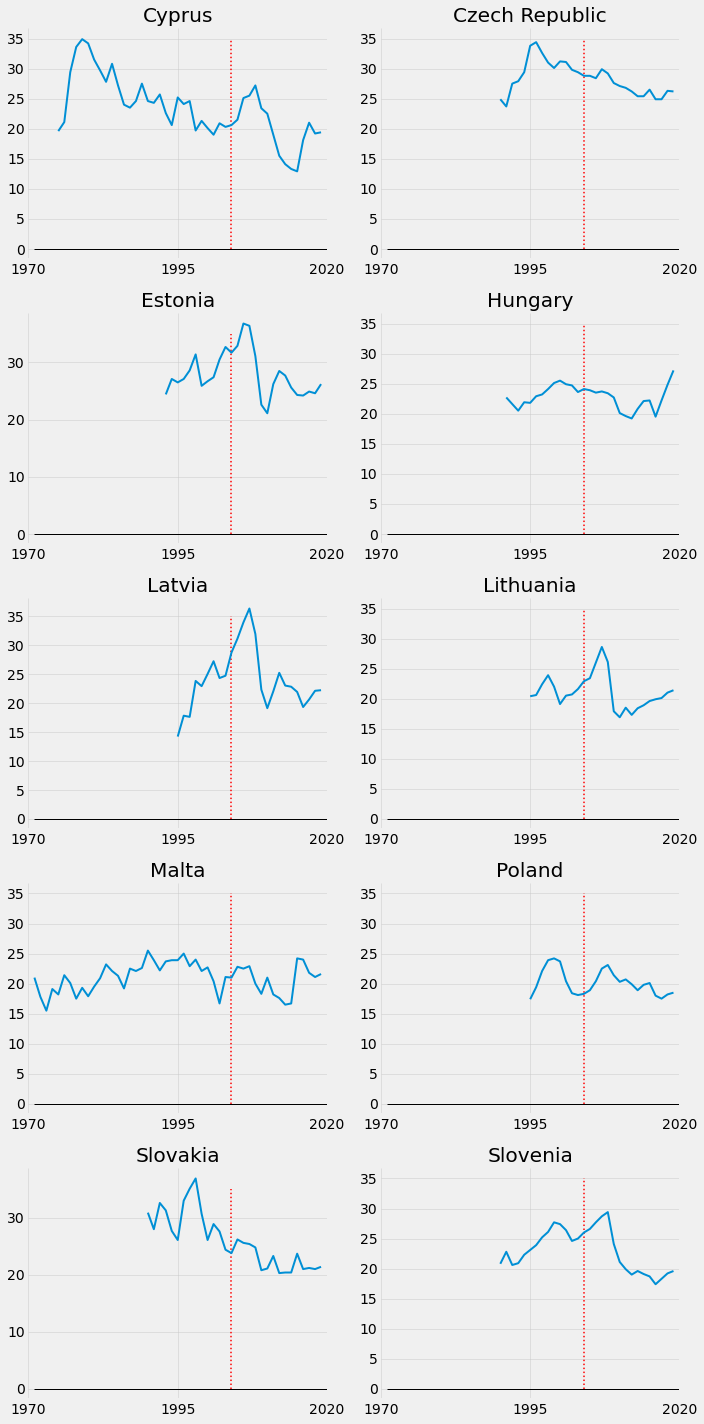

In [ ]:
# Utilizing the same commands as before
# We plot the GFCF for every country that entered the EU in 2004
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False, figsize=(10,20))
axes_list = [item for sublist in axes for item in sublist]

for countryname, selection in wbdata_2004.head(1200).groupby("country"):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='gfcf', label=countryname, ax=ax, legend=False, clip_on=False, linewidth=2)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.5)
    ax.set_xlim((1970, 2020))
    ax.set_xlabel("")
    ax.set_xticks(range(1970, 2021, 25))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.vlines(x=2004, ymin=0, ymax=35, color='red', ls= ':', lw=1.5)
    ax.hlines(y=0, xmin=1971, xmax=2020, color='black', lw=1)

for ax in axes_list:
    ax.remove()

plt.tight_layout()

In this final set of graphs we can see the gross fixed capital formation (GFCF) plotted over time. GFCF is also referred to as investment and through increasing both aggregate demand and future productive capacity, investments are a good indicator of economic growth. For most countries, we can see an increase in GFCF right 2004. Just like for the other sets of plots, the financial crisis is visible through the sudden decrease in GFCF. Overall, GFCF remained relatively constant over time, although there have been deviations that can be explained by both entering the EU and the financial crisis.

### Regression Discontinuity Design Analysis

#### Country-Specific Regression Discontinuity Analysis

To estimate the impact of joining the EU on our chosen variables (FDI inflows and outflows, trade, and GFCF), we exploit the fact that this date of accession imposes a natural sharp discontinuity in our data. Since there were several countries which joined the EU in the same year and on the same day, we can complete both a country-specific analysis and an aggregate analysis of the effect of joining the EU. The RDD method is particularly useful for our question, as we are primarily interested not in the long-run effects of accession, but in the immediate effect on foreign investment, capital formation, and trade. The RDD will give us a Local Average Treatment Effect (LATE), since we only know the effect at the threshold (the year 2004). For countries at the threshold, they could have either joined or not joined the EU (such that being joining the EU does not depend on trade, FDI flows, and GFCF). We must assume that the country entering the EU on that day and year is relatively random, which we can reasonably do given that the countries are arbitrarily chosen to join on the same day in the same year (compared to, for example, being chosen to join in 2003 or 2005).

 In choosing to focus on our variables of interest and running a separate RDD on each as the outcome variable, we can avoid both endogeneity bias and serial correlation problems in the analysis. Our running variable is the year of the observation (the years 1971 to 2019), and we focus on observations in the years previous the accession and after the accession. To estimate the treatment effect of joining the EU, we then estimate the right-hand limit of the linear regression running from 1971 to 2004, the left-hand limit of the linear regression running from 2004 to 2019, and compare them to see if there exists enough of a discontinuity or kink to signify a treatment effect.


First, we need to centralize our running variable, **year**, at our given cut-off threshold, given **enter**. Since our primary dataset is composed of countries which joined the EU in 2004, we need only centralize our data around 2004. In the RDD plots, this centralization will index the year 2004 as a threshold of 0, where the years before 2004 appear as negative numbers and those after 2004 as positive numbers.

In [ ]:
# Centralizing our data at the cut-off threshold of 2004
wbdata["year"] -= 2004

After centralizing the date variable, we will now run separate RDD linear regressions for each of the countries which joined in 2004, to analyze the effect of joining the EU on FDI inflows, FDI outflows, trade, and GFCF. In these regressions, we do not use an optimal bandwidth  measurement (instead, we choose the entire period of observable data for a more precise estimate) and a linear regression fit for each side of the threshold (as opposed to a polynomial function fit, which can lead to biased or imprecise estimates due to the shape of the data distribution).

We begin our RDD analysis by testing the estimating the effect of joining the EU on Cyprus below.

---

**Cyprus**

We will estimate the effect of joining of FDI inflows, FDI outflows, trade, and GFCF, in that order. We then follow with four corresponding plots which visualize the discontinuities (or kinks), as well as the percent increase from the observations at the threshold.

In [ ]:
# Estimate the effects of joining the EU for Cyprus on FDI inflows
rdd_cyprus = wbdata[wbdata['country'] == 'Cyprus'].assign(threshold = (wbdata['year']>0).astype(int))
model1 = smf.wls('fdi_inflows~year*threshold', rdd_cyprus).fit()
model1.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.3548,18.457,0.290,0.773,-31.920,42.630
year,0.0927,1.093,0.085,0.933,-2.115,2.300
threshold,74.5728,33.665,2.215,0.032,6.584,142.562
year:threshold,3.0955,3.284,0.943,0.351,-3.536,9.727


In [ ]:
# Estimate the effects of joining the EU for Cyprus on FDI outflows
rdd_cyprus = wbdata[wbdata['country'] == 'Cyprus'].assign(threshold = (wbdata['year']>0).astype(int))
model2 = smf.wls('fdi_outflows~year*threshold', rdd_cyprus).fit()
model2.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.3897,22.983,0.104,0.918,-44.061,48.840
year,0.1180,1.409,0.084,0.934,-2.730,2.966
threshold,88.0437,41.454,2.124,0.040,4.263,171.824
year:threshold,2.5570,4.048,0.632,0.531,-5.623,10.738


In [ ]:
# Estimate the effects of joining the EU for Cyprus on trade
rdd_cyprus = wbdata[wbdata['country'] == 'Cyprus'].assign(threshold = (wbdata['year']>0).astype(int))
model3 = smf.wls('trade~year*threshold', rdd_cyprus).fit()
model3.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,126.4798,3.961,31.929,0.000,118.480,134.480
year,0.8267,0.235,3.524,0.001,0.353,1.300
threshold,-29.0560,7.225,-4.021,0.000,-43.648,-14.464
year:threshold,2.4237,0.705,3.439,0.001,1.000,3.847


In [ ]:
# Estimate the effects of joining the EU for Cyprus on GFCF
rdd_cyprus = wbdata[wbdata['country'] == 'Cyprus'].assign(threshold = (wbdata['year']>0).astype(int))
model4 = smf.wls('gfcf~year*threshold', rdd_cyprus).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,20.1142,1.306,15.405,0.000,17.477,22.751
year,-0.3438,0.077,-4.447,0.000,-0.500,-0.188
threshold,4.4125,2.382,1.853,0.071,-0.397,9.222
year:threshold,-0.2412,0.232,-1.038,0.305,-0.710,0.228


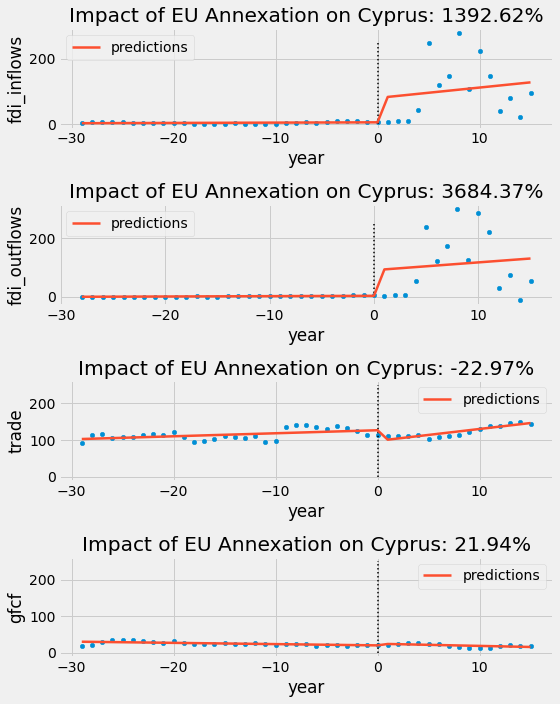

In [ ]:
# We set up the figure environment
plt.figure(figsize=(8,10))

# Then, we plot the effect of Cyprus joining the EU on FDI flows, trade, and GFCF
# We add the regression lines, called predictions, which demonstrate the kinks/discontinuity in the data
for p, variable in enumerate(["fdi_inflows", "fdi_outflows", "trade", "gfcf"], 1):
    ax = plt.subplot(4,1,p)
    wbdata[wbdata['country'] == 'Cyprus'].plot.scatter(x="year", y=variable, ax=ax)
    m = smf.wls(f"{variable}~year*threshold", rdd_cyprus).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    wbdata[wbdata['country'] == 'Cyprus'].assign(predictions=m.fittedvalues).plot(x="year", y="predictions", ax=ax, color="C1", linewidth=2.5)
    plt.title(f"Impact of EU Annexation on Cyprus: {np.round(ate_pct, 2)}%") # We add the percent increase which occurs at the threshold for each variable
    ax.vlines(x=0, ymin=0, ymax=250, color='black', ls= ':', lw=1.5)

# And plot all 4 graphs into one figure
plt.tight_layout()


The RDD regression estimates and plots tells us that:

*   FDI inflows increase by 74.5728 percentage points at the threshold. As the P-value of the estimate is 0.032, we consider the effect to be statistically significant at the 5% significance level. The RDD plots tell us that joining the EU increases FDI inflows by 1392.62%.
*   FDI outflows increase by 88.0437 percentage points at the threshold. As the P-value of the estimate is 0.04, we consider the effect to be statistically significant at the 5% significance level. The RDD plots tell us that joining the EU increases FDI outflows by 3684.37%.
* Trade decreases by 29.0560 percentage points at the threshold. The estimate is statistically significant at the 1% significance level. The RDD plots tell us that joining the EU decreases trade by 22.97%.
* GFCF increases by	4.4125 percentage points at the threshold. The P-value of the estimate is 0.071, it is only statistically significant at the 10% significance level. The RDD plots tell us that joining the EU increases GFCF by 21.94%.







---


**The Czech Republic**

We repeat the above process for each of the 9 other countries which joined in 2004. Below is the RDD analysis of the Czech Republic.

In [ ]:
rdd_czech = wbdata[wbdata['country'] == 'Czech Republic'].assign(threshold = (wbdata['year']>0).astype(int))
model1 = smf.wls('fdi_inflows~year*threshold', rdd_czech).fit()
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.7692,1.339,5.803,0.000,5.000,10.539
year,0.4853,0.206,2.354,0.027,0.059,0.912
threshold,-1.6854,1.894,-0.890,0.383,-5.603,2.232
year:threshold,-0.7025,0.253,-2.772,0.011,-1.227,-0.178


In [ ]:
rdd_czech = wbdata[wbdata['country'] == 'Czech Republic'].assign(threshold = (wbdata['year']>0).astype(int))
model2 = smf.wls('fdi_outflows~year*threshold', rdd_czech).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.7577,0.409,1.855,0.077,-0.087,1.603
year,0.0787,0.063,1.250,0.224,-0.051,0.209
threshold,1.0023,0.578,1.734,0.096,-0.193,2.198
year:threshold,-0.0162,0.077,-0.209,0.836,-0.176,0.144


In [ ]:
rdd_czech = wbdata[wbdata['country'] == 'Czech Republic'].assign(threshold = (wbdata['year']>0).astype(int))
model3 = smf.wls('trade~year*threshold', rdd_czech).fit()
model3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,103.4217,3.526,29.333,0.000,96.174,110.669
year,2.5479,0.429,5.944,0.000,1.667,3.429
threshold,15.6183,5.255,2.972,0.006,4.816,26.421
year:threshold,-0.1104,0.606,-0.182,0.857,-1.356,1.136


In [ ]:
rdd_czech = wbdata[wbdata['country'] == 'Czech Republic'].assign(threshold = (wbdata['year']>0).astype(int))
model4 = smf.wls('gfcf~year*threshold', rdd_czech).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,31.7167,1.009,31.424,0.000,29.642,33.791
year,0.2871,0.123,2.340,0.027,0.035,0.539
threshold,-2.4929,1.504,-1.657,0.110,-5.585,0.600
year:threshold,-0.5768,0.174,-3.324,0.003,-0.933,-0.220


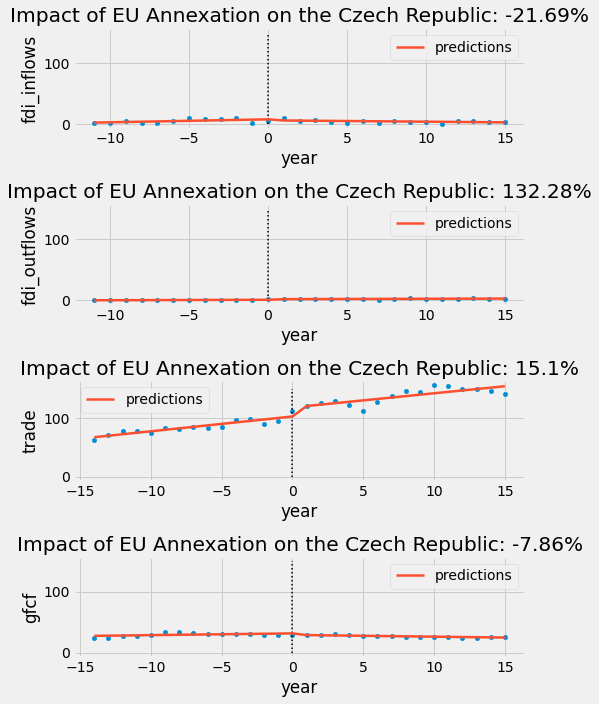

In [ ]:
lt.figure(figsize=(8,10))

for p, variable in enumerate(["fdi_inflows", "fdi_outflows", "trade", "gfcf"], 1):
    ax = plt.subplot(4,1,p)
    wbdata[wbdata['country'] == 'Czech Republic'].plot.scatter(x="year", y=variable, ax=ax, sharey = False)
    m = smf.wls(f"{variable}~year*threshold", rdd_czech).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    wbdata[wbdata['country'] == 'Czech Republic'].assign(predictions=m.fittedvalues).plot(x="year", y="predictions", ax=ax, color="C1", linewidth=2.5)
    plt.title(f"Impact of EU Annexation on the Czech Republic: {np.round(ate_pct, 2)}%")
    ax.vlines(x=0, ymin=0, ymax=150, color='black', ls= ':', lw=1.5)

plt.tight_layout()


The RDD regression estimates and plots tells us that:

* FDI inflows decrease by 1.6854 percentage points at the threshold. As the P-value of the estimate is 0.383, we consider the effect to not be statistically significant at the 5% significance level. The RDD plots tell us that joining the EU decreases FDI inflows by 21.69%.
* FDI outflows increase by 1.0023 percentage points at the threshold. As the P-value of the estimate is 0.096, we consider the effect to not be statistically significant at the 5% significance level. The RDD plots tell us that joining the EU increases FDI outflows by 132.28%.
* Trade decreases by  15.6183 percentage points at the threshold. The estimate is statistically significant at the 1% significance level, as the p-value is the estimate is 0.006. The RDD plots tell us that joining the EU increases trade by 15.1%.
*	GFCF decreases by 2.4929 percentage points at the threshold. The P-value of the estimate is 0.110, it is not statistically significant. The RDD plots tell us that joining the EU decreases GFCF by 7.86%.




---
**Estonia**


In [ ]:
rdd_estonia = wbdata[wbdata['country'] == 'Estonia'].assign(threshold = (wbdata['year']>0).astype(int))
model1 = smf.wls('fdi_inflows~year*threshold', rdd_estonia).fit()
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.1526,1.951,4.692,0.000,5.117,13.188
year,0.4535,0.300,1.510,0.145,-0.168,1.075
threshold,5.3789,2.760,1.949,0.064,-0.330,11.088
year:threshold,-1.2674,0.369,-3.432,0.002,-2.031,-0.504


In [ ]:
rdd_estonia = wbdata[wbdata['country'] == 'Estonia'].assign(threshold = (wbdata['year']>0).astype(int))
model2 = smf.wls('fdi_outflows~year*threshold', rdd_estonia).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.3500,1.608,2.083,0.049,0.023,6.677
year,0.2909,0.248,1.175,0.252,-0.221,0.803
threshold,4.3395,2.275,1.907,0.069,-0.367,9.046
year:threshold,-0.7738,0.304,-2.542,0.018,-1.404,-0.144


In [ ]:
rdd_estonia = wbdata[wbdata['country'] == 'Estonia'].assign(threshold = (wbdata['year']>0).astype(int))
model3 = smf.wls('trade~year*threshold', rdd_estonia).fit()
model3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,126.7372,6.709,18.892,0.000,112.859,140.615
year,-1.7129,1.033,-1.658,0.111,-3.850,0.424
threshold,9.7581,9.490,1.028,0.315,-9.874,29.390
year:threshold,2.9469,1.270,2.321,0.030,0.320,5.574


In [ ]:
rdd_estonia = wbdata[wbdata['country'] == 'Estonia'].assign(threshold = (wbdata['year']>0).astype(int))
model4 = smf.wls('gfcf~year*threshold', rdd_estonia).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,31.1987,1.701,18.337,0.000,27.679,34.718
year,0.5210,0.262,1.988,0.059,-0.021,1.063
threshold,1.7584,2.407,0.731,0.472,-3.221,6.738
year:threshold,-1.1981,0.322,-3.720,0.001,-1.864,-0.532


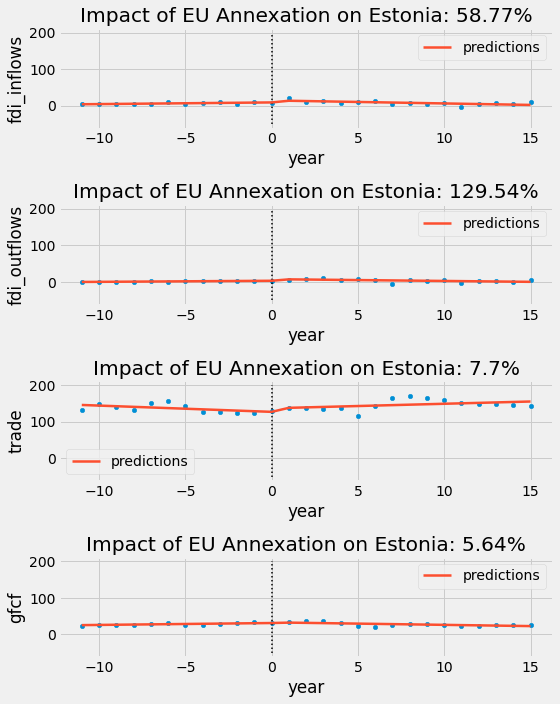

In [ ]:
plt.figure(figsize=(8,10))

for p, variable in enumerate(["fdi_inflows", "fdi_outflows", "trade", "gfcf"], 1):
    ax = plt.subplot(4,1,p)
    wbdata[wbdata['country'] == 'Estonia'].plot.scatter(x="year", y=variable, ax=ax, sharey = False)
    m = smf.wls(f"{variable}~year*threshold", rdd_estonia).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    wbdata[wbdata['country'] == 'Estonia'].assign(predictions=m.fittedvalues).plot(x="year", y="predictions", ax=ax, color="C1", linewidth=2.5)
    plt.title(f"Impact of EU Annexation on Estonia: {np.round(ate_pct, 2)}%")
    ax.vlines(x=0, ymin=-50, ymax=200, color='black', ls= ':', lw=1.5)

plt.tight_layout()

The RDD regression estimates and plots tells us that:

* FDI inflows increase by 5.3789 percentage points at the threshold. As the P-value of the estimate is 0.064, we consider the effect to be statistically significant at the 10% significance level. The RDD plots tell us that joining the EU increases FDI inflows by 58.77%.
*	FDI outflows increase by 4.3395 percentage points at the threshold. As the P-value of the estimate is 0.069, we consider the effect to be statistically significant at the 10% significance level. The RDD plots tell us that joining the EU increases FDI outflows by 129.54%.
*	Trade increases by 9.7581 percentage points at the threshold. The estimate is not statistically significant. The RDD plots tell us that joining the EU increases trade by 7.7%.
*	GFCF increases by 1.7584 percentage points at the threshold. The P-value of the estimate is 0.472, the estimate is not statistically significant. The RDD plots tell us that joining the EU increases GFCF by 5.64%.





---

**Hungary**



In [ ]:
rdd_hungary = wbdata[wbdata['country'] == 'Hungary'].assign(threshold = (wbdata['year']>0).astype(int))
model1 = smf.wls('fdi_inflows~year*threshold', rdd_hungary).fit()
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.3086,9.138,0.690,0.496,-12.511,25.128
year,0.0431,1.195,0.036,0.972,-2.417,2.504
threshold,21.9800,13.393,1.641,0.113,-5.603,49.563
year:threshold,-2.2116,1.608,-1.375,0.181,-5.524,1.101


In [ ]:
rdd_hungary = wbdata[wbdata['country'] == 'Hungary'].assign(threshold = (wbdata['year']>0).astype(int))
model2 = smf.wls('fdi_outflows~year*threshold', rdd_hungary).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.4400,9.208,0.265,0.793,-16.523,21.403
year,0.2281,1.204,0.190,0.851,-2.251,2.707
threshold,23.1905,13.495,1.718,0.098,-4.603,50.984
year:threshold,-2.2978,1.621,-1.418,0.169,-5.636,1.040


In [ ]:
rdd_hungary = wbdata[wbdata['country'] == 'Hungary'].assign(threshold = (wbdata['year']>0).astype(int))
model3 = smf.wls('trade~year*threshold', rdd_hungary).fit()
model3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,138.0343,5.312,25.985,0.000,127.094,148.975
year,6.6382,0.695,9.558,0.000,5.208,8.069
threshold,6.6590,7.786,0.855,0.401,-9.376,22.694
year:threshold,-4.9107,0.935,-5.252,0.000,-6.836,-2.985


In [ ]:
rdd_hungary = wbdata[wbdata['country'] == 'Hungary'].assign(threshold = (wbdata['year']>0).astype(int))
model4 = smf.wls('gfcf~year*threshold', rdd_hungary).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,25.1143,0.914,27.471,0.000,23.231,26.997
year,0.2747,0.120,2.298,0.030,0.029,0.521
threshold,-3.1162,1.340,-2.326,0.028,-5.876,-0.357
year:threshold,-0.2337,0.161,-1.452,0.159,-0.565,0.098


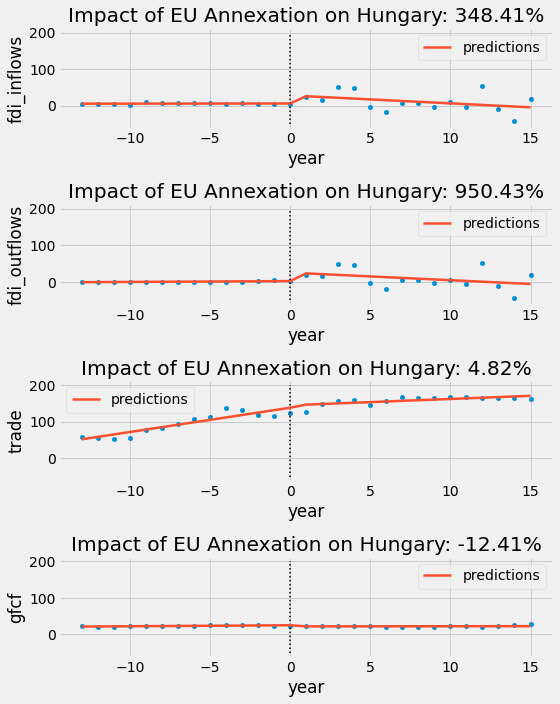

In [ ]:
plt.figure(figsize=(8,10))

for p, variable in enumerate(["fdi_inflows", "fdi_outflows", "trade", "gfcf"], 1):
    ax = plt.subplot(4,1,p)
    wbdata[wbdata['country'] == 'Hungary'].plot.scatter(x="year", y=variable, ax=ax, sharey = False)
    m = smf.wls(f"{variable}~year*threshold", rdd_hungary).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    wbdata[wbdata['country'] == 'Hungary'].assign(predictions=m.fittedvalues).plot(x="year", y="predictions", ax=ax, color="C1", linewidth=2.5)
    plt.title(f"Impact of EU Annexation on Hungary: {np.round(ate_pct, 2)}%")
    ax.vlines(x=0, ymin=-50, ymax=200, color='black', ls= ':', lw=1.5)

plt.tight_layout()

The RDD regression estimates and plots tells us that:

* FDI inflows increase by 21.98 percentage points at the threshold. As the P-value of the estimate is 0.113, we consider the effect to not be statistically significant. The RDD plots tell us that joining the EU increases FDI inflows by 348.41%.
*	FDI outflows increase by 23.1905 percentage points at the threshold. As the P-value of the estimate is 0.098, we consider the effect to be statistically significant at the 10% significance level. The RDD plots tell us that joining the EU increases FDI outflows by 950.43%.
*	Trade decreases by 6.6590 percentage points at the threshold. The estimate is not statistically significant. The RDD plots tell us that joining the EU decreases trade by 4.82%.
*	GFCF decreases by 3.1162 percentage points at the threshold. The P-value of the estimate is 0.028, it is statistically significant at the 5% significance level. The RDD plots tell us that joining the EU decreases GFCF by 12.41%.




---

**Latvia**

In [ ]:
rdd_latvia = wbdata[wbdata['country'] == 'Latvia'].assign(threshold = (wbdata['year']>0).astype(int))
model1 = smf.wls('fdi_inflows~year*threshold', rdd_latvia).fit()
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.5509,1.122,2.273,0.034,0.218,4.884
year,-0.3576,0.210,-1.701,0.104,-0.795,0.080
threshold,3.3062,1.528,2.164,0.042,0.128,6.484
year:threshold,0.0829,0.239,0.347,0.732,-0.414,0.580


In [ ]:
rdd_latvia = wbdata[wbdata['country'] == 'Latvia'].assign(threshold = (wbdata['year']>0).astype(int))
model2 = smf.wls('fdi_outflows~year*threshold', rdd_latvia).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.6145,0.501,1.226,0.234,-0.428,1.657
year,0.0988,0.094,1.052,0.305,-0.097,0.294
threshold,0.6483,0.683,0.949,0.353,-0.772,2.068
year:threshold,-0.1491,0.107,-1.396,0.177,-0.371,0.073


In [ ]:
rdd_latvia = wbdata[wbdata['country'] == 'Latvia'].assign(threshold = (wbdata['year']>0).astype(int))
model3 = smf.wls('trade~year*threshold', rdd_latvia).fit()
model3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,88.0618,4.801,18.343,0.000,78.078,98.046
year,0.6248,0.899,0.695,0.495,-1.245,2.495
threshold,5.4096,6.538,0.827,0.417,-8.187,19.006
year:threshold,1.7912,1.023,1.751,0.095,-0.337,3.919


In [ ]:
rdd_latvia = wbdata[wbdata['country'] == 'Latvia'].assign(threshold = (wbdata['year']>0).astype(int))
model4 = smf.wls('gfcf~year*threshold', rdd_latvia).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,28.7455,1.971,14.585,0.000,24.647,32.844
year,1.3612,0.369,3.687,0.001,0.593,2.129
threshold,3.4479,2.684,1.285,0.213,-2.134,9.030
year:threshold,-2.2712,0.420,-5.407,0.000,-3.145,-1.398


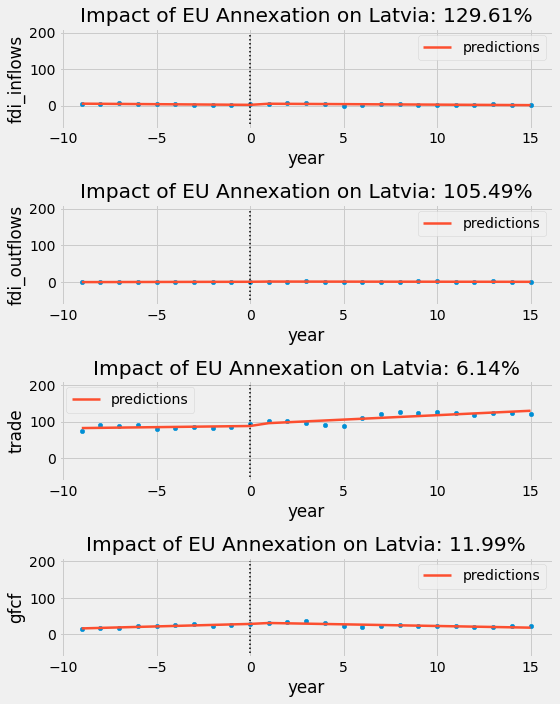

In [ ]:
plt.figure(figsize=(8,10))

for p, variable in enumerate(["fdi_inflows", "fdi_outflows", "trade", "gfcf"], 1):
    ax = plt.subplot(4,1,p)
    wbdata[wbdata['country'] == 'Latvia'].plot.scatter(x="year", y=variable, ax=ax, sharey = False)
    m = smf.wls(f"{variable}~year*threshold", rdd_latvia).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    wbdata[wbdata['country'] == 'Latvia'].assign(predictions=m.fittedvalues).plot(x="year", y="predictions", ax=ax, color="C1", linewidth=2.5)
    plt.title(f"Impact of EU Annexation on Latvia: {np.round(ate_pct, 2)}%")
    ax.vlines(x=0, ymin=-50, ymax=200, color='black', ls= ':', lw=1.5)

plt.tight_layout()

The RDD regression estimates and plots tells us that:

*	FDI inflows increase by 3.3062 percentage points at the threshold. As the P-value of the estimate is 0.042, we consider the effect to be statistically significant at the 5% significance level. The RDD plots tell us that joining the EU increases FDI inflows by 129.61%.
*	FDI outflows increase by 0.6483 percentage points at the threshold. As the P-value of the estimate is 0.353, we consider the effect to not be statistically significant. The RDD plots tell us that joining the EU increases FDI outflows by 105.49%.
*	Trade increases by 5.4096 percentage points at the threshold. The estimate is not statistically significant. The RDD plots tell us that joining the EU increases trade by 6.14%.
*	GFCF increases by 3.4479 percentage points at the threshold. The P-value of the estimate is 0.213, it is not statistically significant. The RDD plots tell us that joining the EU increases GFCF by 11.99%.




---
**Lithuania**


In [ ]:
rdd_lithuania = wbdata[wbdata['country'] == 'Lithuania'].assign(threshold = (wbdata['year']>0).astype(int))
model1 = smf.wls('fdi_inflows~year*threshold', rdd_lithuania).fit()
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.9527,1.203,3.287,0.004,1.452,6.454
year,0.0739,0.225,0.328,0.746,-0.395,0.542
threshold,1.1558,1.638,0.706,0.488,-2.250,4.562
year:threshold,-0.3450,0.256,-1.346,0.193,-0.878,0.188


In [ ]:
rdd_lithuania = wbdata[wbdata['country'] == 'Lithuania'].assign(threshold = (wbdata['year']>0).astype(int))
model2 = smf.wls('fdi_outflows~year*threshold', rdd_lithuania).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.5655,0.291,1.942,0.066,-0.040,1.171
year,0.0679,0.055,1.244,0.227,-0.046,0.181
threshold,1.1536,0.397,2.909,0.008,0.329,1.978
year:threshold,-0.1136,0.062,-1.830,0.081,-0.243,0.015


In [ ]:
rdd_lithuania = wbdata[wbdata['country'] == 'Lithuania'].assign(threshold = (wbdata['year']>0).astype(int))
model3 = smf.wls('trade~year*threshold', rdd_lithuania).fit()
model3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,98.7055,6.156,16.033,0.000,85.903,111.508
year,1.4212,1.153,1.232,0.231,-0.977,3.819
threshold,17.8907,8.384,2.134,0.045,0.455,35.326
year:threshold,0.9984,1.312,0.761,0.455,-1.730,3.727


In [ ]:
rdd_lithuania = wbdata[wbdata['country'] == 'Lithuania'].assign(threshold = (wbdata['year']>0).astype(int))
model4 = smf.wls('gfcf~year*threshold', rdd_lithuania).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,21.6255,1.606,13.469,0.000,18.287,24.964
year,0.0479,0.301,0.159,0.875,-0.578,0.673
threshold,2.2307,2.186,1.020,0.319,-2.316,6.778
year:threshold,-0.4132,0.342,-1.208,0.241,-1.125,0.298


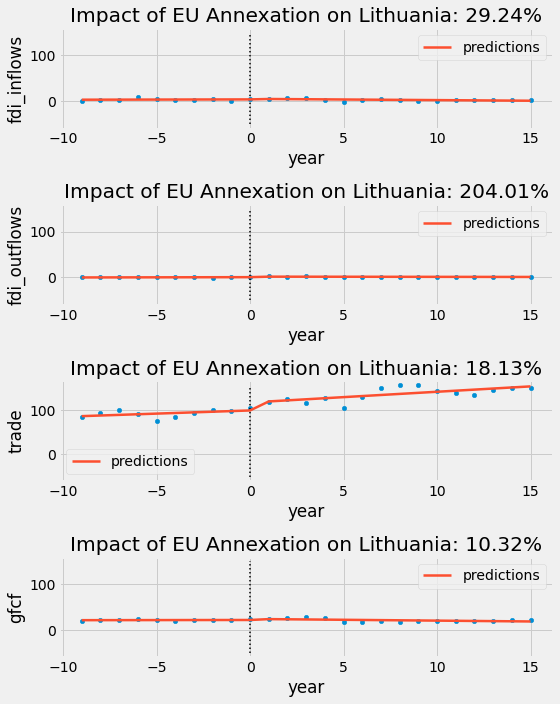

In [ ]:
plt.figure(figsize=(8,10))

for p, variable in enumerate(["fdi_inflows", "fdi_outflows", "trade", "gfcf"], 1):
    ax = plt.subplot(4,1,p)
    wbdata[wbdata['country'] == 'Lithuania'].plot.scatter(x="year", y=variable, ax=ax, sharey = False)
    m = smf.wls(f"{variable}~year*threshold", rdd_lithuania).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    wbdata[wbdata['country'] == 'Lithuania'].assign(predictions=m.fittedvalues).plot(x="year", y="predictions", ax=ax, color="C1", linewidth=2.5)
    plt.title(f"Impact of EU Annexation on Lithuania: {np.round(ate_pct, 2)}%")
    ax.vlines(x=0, ymin=-50, ymax=150, color='black', ls= ':', lw=1.5)

plt.tight_layout()

The RDD regression estimates and plots tells us that:

*	FDI inflows increase by 1.1558 percentage points at the threshold. The effect is not statistically significant. The RDD plots tell us that joining the EU increases FDI inflows by 29.24%.
*	FDI outflows increase by 1.1536 percentage points at the threshold. As the P-value of the estimate is 0.008, we consider the effect to be statistically significant at the 1% significance level. The RDD plots tell us that joining the EU increases FDI outflows by 204.01%.
*	Trade increases by 17.8907 percentage points at the threshold. The estimate is statistically significant at the 5% significance level. The RDD plots tell us that joining the EU increases trade by 18.13%.
*	GFCF increases by 2.2307 percentage points at the threshold. The effect is not statistically significant. The RDD plots tell us that joining the EU increases GFCF by 10.32%.



---
Malta

In [ ]:
rdd_malta = wbdata[wbdata['country'] == 'Malta'].assign(threshold = (wbdata['year']>0).astype(int))
model1 = smf.wls('fdi_inflows~year*threshold', rdd_malta).fit()
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,21.0338,18.832,1.117,0.270,-16.895,58.962
year,0.8090,0.981,0.825,0.414,-1.167,2.785
threshold,295.0072,35.839,8.231,0.000,222.824,367.190
year:threshold,-26.0258,3.494,-7.448,0.000,-33.064,-18.988


In [ ]:
rdd_malta = wbdata[wbdata['country'] == 'Malta'].assign(threshold = (wbdata['year']>0).astype(int))
model2 = smf.wls('fdi_outflows~year*threshold', rdd_malta).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.0960,14.504,0.834,0.409,-17.116,41.308
year,0.5302,0.756,0.702,0.486,-0.992,2.052
threshold,154.4155,27.602,5.594,0.000,98.822,210.009
year:threshold,-19.8792,2.691,-7.387,0.000,-25.300,-14.459


In [ ]:
rdd_malta = wbdata[wbdata['country'] == 'Malta'].assign(threshold = (wbdata['year']>0).astype(int))
model3 = smf.wls('trade~year*threshold', rdd_malta).fit()
model3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,228.0104,8.341,27.336,0.000,211.211,244.810
year,3.1719,0.435,7.300,0.000,2.297,4.047
threshold,42.0543,15.874,2.649,0.011,10.082,74.027
year:threshold,-1.2434,1.548,-0.803,0.426,-4.361,1.874


In [ ]:
rdd_malta = wbdata[wbdata['country'] == 'Malta'].assign(threshold = (wbdata['year']>0).astype(int))
model4 = smf.wls('gfcf~year*threshold', rdd_malta).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,23.1855,0.783,29.595,0.000,21.608,24.763
year,0.1214,0.041,2.975,0.005,0.039,0.204
threshold,-2.6036,1.491,-1.746,0.088,-5.607,0.399
year:threshold,-0.1175,0.145,-0.808,0.423,-0.410,0.175


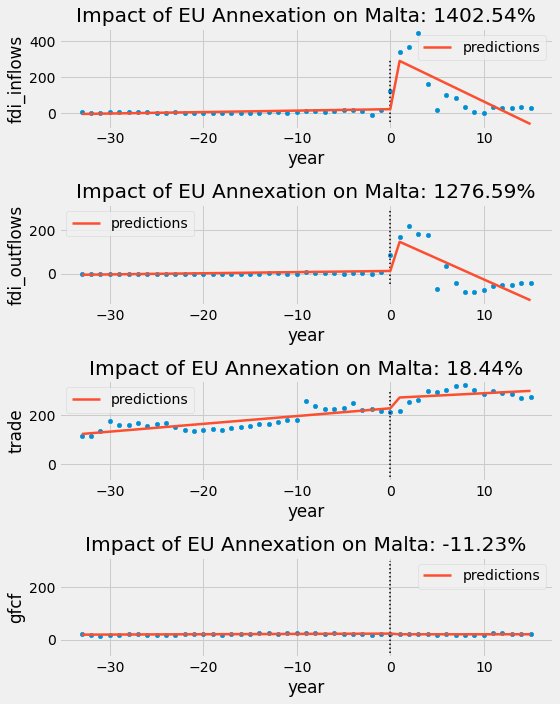

In [ ]:
plt.figure(figsize=(8,10))

for p, variable in enumerate(["fdi_inflows", "fdi_outflows", "trade", "gfcf"], 1):
    ax = plt.subplot(4,1,p)
    wbdata[wbdata['country'] == 'Malta'].plot.scatter(x="year", y=variable, ax=ax, sharey = False)
    m = smf.wls(f"{variable}~year*threshold", rdd_malta).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    wbdata[wbdata['country'] == 'Malta'].assign(predictions=m.fittedvalues).plot(x="year", y="predictions", ax=ax, color="C1", linewidth=2.5)
    plt.title(f"Impact of EU Annexation on Malta: {np.round(ate_pct, 2)}%")
    ax.vlines(x=0, ymin=-50, ymax=300, color='black', ls= ':', lw=1.5)

plt.tight_layout()

The RDD regression estimates and plots tells us that:

*	FDI inflows increase by 21.0338 percentage points at the threshold. The effect is statistically significant at the 1% significance level as the P-value is 0.000. The RDD plots tell us that joining the EU increases FDI inflows by 1402.54%%.
*	FDI outflows increase by 154.4155 percentage points at the threshold. As the P-value of the estimate is 0.000, we consider the effect to be statistically significant at the 1% significance level. The RDD plots tell us that joining the EU increases FDI outflows by 1276.59%.
*	Trade increases by 42.0543 percentage points at the threshold. The estimate is statistically significant at the 5% significance level. The RDD plots tell us that joining the EU increases trade by 18.44%.
*	GFCF decreases by 2.6036 percentage points at the threshold. The effect is statistically significant at the 10% significance level. The RDD plots tell us that joining the EU decreases GFCF by 11.23%.



---
Poland

In [ ]:
rdd_poland = wbdata[wbdata['country'] == 'Poland'].assign(threshold = (wbdata['year']>0).astype(int))
model1 = smf.wls('fdi_inflows~year*threshold', rdd_poland).fit()
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.5825,0.607,7.555,0.000,3.336,5.829
year,0.2775,0.074,3.763,0.001,0.126,0.429
threshold,-0.0768,0.904,-0.085,0.933,-1.935,1.782
year:threshold,-0.4332,0.104,-4.154,0.000,-0.648,-0.219


In [ ]:
rdd_poland = wbdata[wbdata['country'] == 'Poland'].assign(threshold = (wbdata['year']>0).astype(int))
model2 = smf.wls('fdi_outflows~year*threshold', rdd_poland).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.3342,0.335,0.997,0.328,-0.355,1.023
year,0.0325,0.041,0.797,0.432,-0.051,0.116
threshold,1.5458,0.500,3.093,0.005,0.519,2.573
year:threshold,-0.1200,0.058,-2.082,0.047,-0.238,-0.002


In [ ]:
rdd_poland = wbdata[wbdata['country'] == 'Poland'].assign(threshold = (wbdata['year']>0).astype(int))
model3 = smf.wls('trade~year*threshold', rdd_poland).fit()
model3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,70.2327,1.609,43.648,0.000,66.886,73.579
year,2.9073,0.301,9.646,0.000,2.280,3.534
threshold,-1.0889,2.191,-0.497,0.624,-5.646,3.468
year:threshold,-0.3694,0.343,-1.077,0.294,-1.083,0.344


In [ ]:
rdd_poland = wbdata[wbdata['country'] == 'Poland'].assign(threshold = (wbdata['year']>0).astype(int))
model4 = smf.wls('gfcf~year*threshold', rdd_poland).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,19.7582,1.154,17.118,0.000,17.358,22.159
year,-0.1848,0.216,-0.855,0.402,-0.634,0.265
threshold,2.0675,1.572,1.315,0.203,-1.201,5.337
year:threshold,-0.0584,0.246,-0.237,0.815,-0.570,0.453


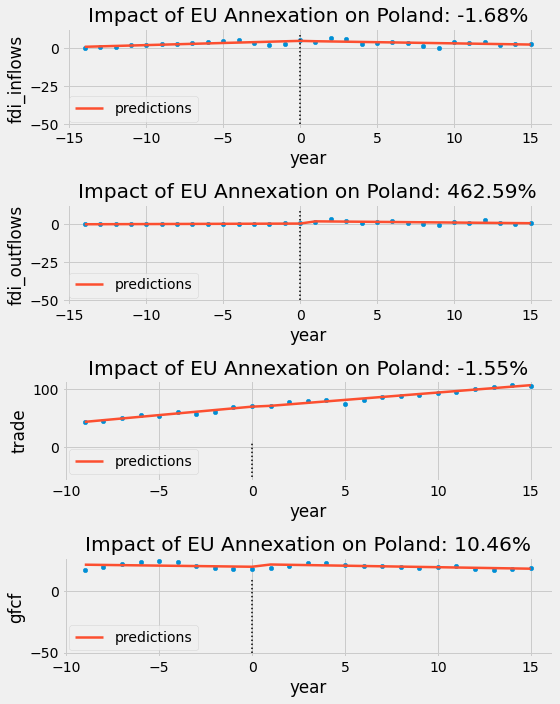

In [ ]:
plt.figure(figsize=(8,10))

for p, variable in enumerate(["fdi_inflows", "fdi_outflows", "trade", "gfcf"], 1):
    ax = plt.subplot(4,1,p)
    wbdata[wbdata['country'] == 'Poland'].plot.scatter(x="year", y=variable, ax=ax, sharey = False)
    m = smf.wls(f"{variable}~year*threshold", rdd_poland).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    wbdata[wbdata['country'] == 'Poland'].assign(predictions=m.fittedvalues).plot(x="year", y="predictions", ax=ax, color="C1", linewidth=2.5)
    plt.title(f"Impact of EU Annexation on Poland: {np.round(ate_pct, 2)}%")
    ax.vlines(x=0, ymin=-50, ymax=10, color='black', ls= ':', lw=1.5)

plt.tight_layout()

The RDD regression estimates and plots tells us that:

*	FDI inflows decrease by 0.0768 percentage points at the threshold. The effect is not statistically significant. The RDD plots tell us that joining the EU decreases FDI inflows by 1.68%.
*	FDI outflows increase by 1.5458 percentage points at the threshold. As the P-value of the estimate is 0.005, we consider the effect to be statistically significant at the 1% significance level. The RDD plots tell us that joining the EU increases FDI outflows by 462.59%.
*	Trade decreases by 1.0889 percentage points at the threshold. The effect is not statistically significant. The RDD plots tell us that joining the EU decreases trade by 1.55%.
*	GFCF increases by 2.0675 percentage points at the threshold. The effect is not statistically significant. The RDD plots tell us that joining the EU increases GFCF by 10.46%.



---
Slovakia

In [ ]:
rdd_slovakia = wbdata[wbdata['country'] == 'Slovakia'].assign(threshold = (wbdata['year']>0).astype(int))
model1 = smf.wls('fdi_inflows~year*threshold', rdd_slovakia).fit()
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.1385,1.331,5.361,0.000,4.384,9.893
year,0.6570,0.205,3.204,0.004,0.233,1.081
threshold,-1.3927,1.884,-0.739,0.467,-5.289,2.504
year:threshold,-0.9377,0.252,-3.721,0.001,-1.459,-0.416


In [ ]:
rdd_slovakia = wbdata[wbdata['country'] == 'Slovakia'].assign(threshold = (wbdata['year']>0).astype(int))
model2 = smf.wls('fdi_outflows~year*threshold', rdd_slovakia).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2500,0.609,0.410,0.685,-1.011,1.511
year,0.0091,0.094,0.097,0.924,-0.185,0.203
threshold,1.1938,0.862,1.385,0.179,-0.590,2.977
year:threshold,-0.0187,0.115,-0.162,0.872,-0.257,0.220


In [ ]:
rdd_slovakia = wbdata[wbdata['country'] == 'Slovakia'].assign(threshold = (wbdata['year']>0).astype(int))
model3 = smf.wls('trade~year*threshold', rdd_slovakia).fit()
model3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,128.7608,6.575,19.583,0.000,115.245,142.276
year,2.6611,0.799,3.329,0.003,1.018,4.304
threshold,19.2458,9.800,1.964,0.060,-0.899,39.391
year:threshold,0.2139,1.130,0.189,0.851,-2.110,2.538


In [ ]:
rdd_slovakia = wbdata[wbdata['country'] == 'Slovakia'].assign(threshold = (wbdata['year']>0).astype(int))
model4 = smf.wls('gfcf~year*threshold', rdd_slovakia).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,27.1000,1.383,19.599,0.000,24.258,29.942
year,-0.3486,0.168,-2.074,0.048,-0.694,-0.003
threshold,-2.0029,2.061,-0.972,0.340,-6.239,2.234
year:threshold,0.0164,0.238,0.069,0.945,-0.472,0.505


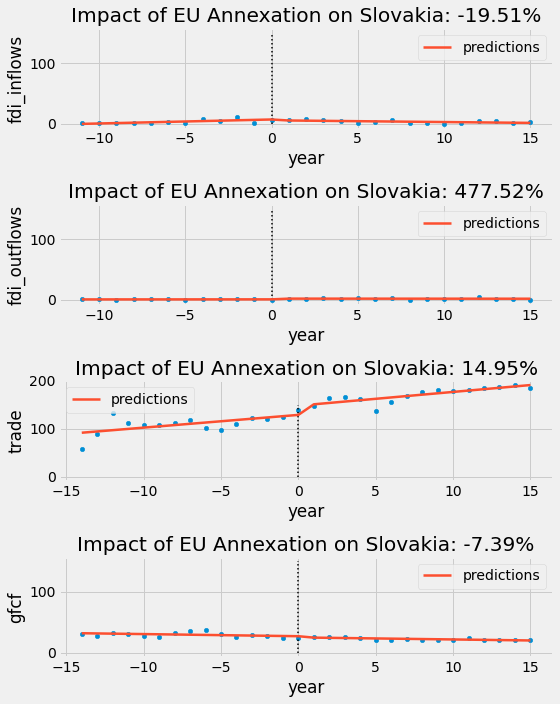

In [ ]:
plt.figure(figsize=(8,10))

for p, variable in enumerate(["fdi_inflows", "fdi_outflows", "trade", "gfcf"], 1):
    ax = plt.subplot(4,1,p)
    wbdata[wbdata['country'] == 'Slovakia'].plot.scatter(x="year", y=variable, ax=ax, sharey = False)
    m = smf.wls(f"{variable}~year*threshold", rdd_slovakia).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    wbdata[wbdata['country'] == 'Slovakia'].assign(predictions=m.fittedvalues).plot(x="year", y="predictions", ax=ax, color="C1", linewidth=2.5)
    plt.title(f"Impact of EU Annexation on Slovakia: {np.round(ate_pct, 2)}%")
    ax.vlines(x=0, ymin=0, ymax=150, color='black', ls= ':', lw=1.5)

plt.tight_layout()

The RDD regression estimates and plots tells us that:

*	FDI inflows decrease by 1.3927 percentage points at the threshold. The effect is not statistically significant. The RDD plots tell us that joining the EU decreases FDI inflows by 19.51%.
*	FDI outflows increase by 1.1938 percentage points at the threshold. The effect is not statistically significant. The RDD plots tell us that joining the EU increases FDI outflows by 477.52%.
*	Trade increases by 19.2458 percentage points at the threshold. The effect is statistically significant at the 10% significance level. The RDD plots tell us that joining the EU increases trade by 14.95%.
* GFCF decreases by 2.0029 percentage points at the threshold. The effect is not statistically significant. The RDD plots tell us that joining the EU decreases GFCF by 7.39%.



---
Slovenia

In [ ]:
rdd_slovenia = wbdata[wbdata['country'] == 'Slovenia'].assign(threshold = (wbdata['year']>0).astype(int))
model1 = smf.wls('fdi_inflows~year*threshold', rdd_slovenia).fit()
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.1956,0.835,3.827,0.001,1.472,4.919
year,0.2505,0.118,2.122,0.044,0.007,0.494
threshold,-1.8499,1.203,-1.538,0.137,-4.332,0.632
year:threshold,-0.1688,0.152,-1.113,0.277,-0.482,0.144


In [ ]:
rdd_slovenia = wbdata[wbdata['country'] == 'Slovenia'].assign(threshold = (wbdata['year']>0).astype(int))
model2 = smf.wls('fdi_outflows~year*threshold', rdd_slovenia).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.4582,0.531,2.748,0.011,0.363,2.554
year,0.1610,0.075,2.145,0.042,0.006,0.316
threshold,0.8808,0.764,1.152,0.261,-0.697,2.458
year:threshold,-0.3017,0.096,-3.129,0.005,-0.501,-0.103


In [ ]:
rdd_slovenia = wbdata[wbdata['country'] == 'Slovenia'].assign(threshold = (wbdata['year']>0).astype(int))
model3 = smf.wls('trade~year*threshold', rdd_slovenia).fit()
model3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,93.7542,5.887,15.925,0.000,81.653,105.856
year,-1.9361,0.716,-2.705,0.012,-3.407,-0.465
threshold,25.1401,8.775,2.865,0.008,7.102,43.178
year:threshold,4.6068,1.012,4.552,0.000,2.526,6.687


In [ ]:
rdd_slovenia = wbdata[wbdata['country'] == 'Slovenia'].assign(threshold = (wbdata['year']>0).astype(int))
model4 = smf.wls('gfcf~year*threshold', rdd_slovenia).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,27.1442,0.964,28.169,0.000,25.163,29.125
year,0.4225,0.117,3.607,0.001,0.182,0.663
threshold,1.0492,1.436,0.730,0.472,-1.903,4.002
year:threshold,-1.2100,0.166,-7.304,0.000,-1.551,-0.869


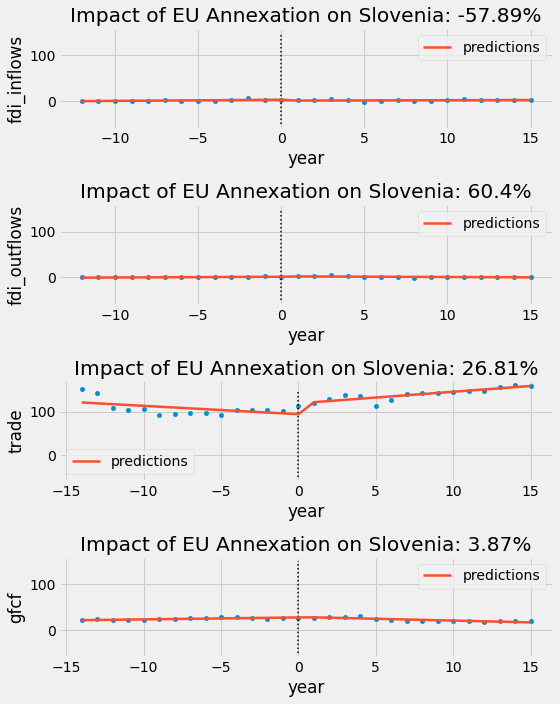

In [ ]:
plt.figure(figsize=(8,10))

for p, variable in enumerate(["fdi_inflows", "fdi_outflows", "trade", "gfcf"], 1):
    ax = plt.subplot(4,1,p)
    wbdata[wbdata['country'] == 'Slovenia'].plot.scatter(x="year", y=variable, ax=ax, sharey = False)
    m = smf.wls(f"{variable}~year*threshold", rdd_slovenia).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    wbdata[wbdata['country'] == 'Slovenia'].assign(predictions=m.fittedvalues).plot(x="year", y="predictions", ax=ax, color="C1", linewidth=2.5)
    plt.title(f"Impact of EU Annexation on Slovenia: {np.round(ate_pct, 2)}%")
    ax.vlines(x=0, ymin=-50, ymax=150, color='black', ls= ':', lw=1.5)

plt.tight_layout()

The RDD regression estimates and plots tells us that:

*	FDI inflows decrease by 1.8499 percentage points at the threshold. The effect is not statistically significant. The RDD plots tell us that joining the EU decreases FDI inflows by 57.89%.
*	FDI outflows increase by 0.8808 percentage points at the threshold. We consider the effect to not be statistically significant. The RDD plots tell us that joining the EU increases FDI outflows by 60.4%.
*	Trade decreases by 25.1401 percentage points at the threshold. As the P-value of the estimate is 0.008, we consider the effect to be statistically significant at the 1% significance level.  The RDD plots tell us that joining the EU increases trade by 26.81%.
*	GFCF increases by 1.0492 percentage points at the threshold. The effect is not statistically significant. The RDD plots tell us that joining the EU increases GFCF by 3.87%.



We can see that across all 10 countries there appears to be no clear pattern of neither magnitude of estimated treatment effect nor statistical significance of the estimate.

For Slovakia, Slovenia, and the Czech Republic, neither FDI flows nor GFCF estimates are statistically significant. However, trade estimates are statistically significant and large in magnitude. For Poland and Estonia, only the estimate for FDI outflows is statistically significant, but are not large in magnitude compared to other countries' estimates of FDI outflows. They do not have a consistent direction, such that some see negative treatment effects and some positive.

For Malta and Cyprus, all estimates are statistically significant and large in magnitude relative to other countries' estimates. For Hungary and Latvia, only the FDI outflows and GFCF estimates are statistically significant and relatively large in magnitude. For Lithuania, only the FDI inflows and trade estimates are statistically significant, but not large in magnitude.

Although the estimate patterns of the individual countries may appear as random, it is possible that they are pooled by the size or the productive capacity of the economy. In further studies, this could be tested by grouping the economies by productive capacity, or even by economic makeup and investment opportunities (such as Cyprus and Malta, who unequivocally experienced the largest effects from joining the EU).

#### Combined Country Regression Discontinuity

Since we have a selection of countries that entered the EU on the same day in 2004, we can now perform an RDD regression on their aggregate measures. Because repeat observations for any year (that is to say, 10 observations for every year) are not a problem due to the RDD analysis, we can simply run the model over the entire dataset of countries that joined in 2004.  Again, we are primarily interested in a total effect of joining the EU for any country that joined in 2004, so we are simply interested in the existence of a discontinuity or kink with the aggregated data and a significantly non-zero and statistically significant treatment effect.

As we did before, we want to create a separate dataframe consisting only of the countries that joined the EU in 2004. We do this again such that we can easily have a centralized running variable at the year 2004 without further indexing. As such, we do not need to centralize our variable again. We can see what the dataset looks like with the centralized **year** variable below.

In [ ]:
# Creating (again) a separate dataframe for countries that entered the EU in 2004
wbdata_2004 = wbdata[(wbdata['enter'] == 2004)]
print(wbdata_2004)

       country  year  trade  fdi_outflows  fdi_inflows  gfcf  enter
196     Cyprus   -33    NaN           NaN          NaN   NaN   2004
197     Cyprus   -32    NaN           NaN          NaN   NaN   2004
198     Cyprus   -31    NaN           NaN          NaN   NaN   2004
199     Cyprus   -30    NaN           NaN          NaN   NaN   2004
200     Cyprus   -29   92.2           NaN          3.7  19.6   2004
...        ...   ...    ...           ...          ...   ...    ...
1220  Slovenia    11  146.3           0.8          4.0  18.7   2004
1221  Slovenia    12  146.7           1.1          3.2  17.4   2004
1222  Slovenia    13  157.3           1.3          2.5  18.3   2004
1223  Slovenia    14  161.1           0.8          2.8  19.2   2004
1224  Slovenia    15  159.0           1.6          3.2  19.6   2004

[490 rows x 7 columns]


We  utlilize the same methods as before, when running the RDD for each individual country. Now we run the model on the aggregated data, with a separate regression for each variable: FDI inflows, FDI outflows, trade, and GFCF.

In [ ]:
# Estimate the model for all combined countries joining the EU in 2004 for FDI inflows
rdd_combined = wbdata_2004.assign(threshold = (wbdata_2004['year']>0).astype(int))
model1 = smf.wls('fdi_inflows~year*threshold', rdd_combined).fit()
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0387,5.778,1.218,0.224,-4.330,18.407
year,0.2256,0.459,0.491,0.624,-0.678,1.129
threshold,39.7049,9.990,3.975,0.000,20.048,59.362
year:threshold,-2.8384,1.007,-2.819,0.005,-4.820,-0.857


In [ ]:
# Estimate the model for all combined countries joining the EU in 2004 for FDI outflows
rdd_combined = wbdata_2004.assign(threshold = (wbdata_2004['year']>0).astype(int))
model2 = smf.wls('fdi_outflows~year*threshold', rdd_combined).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.4944,4.998,0.499,0.618,-7.341,12.329
year,0.1396,0.403,0.347,0.729,-0.653,0.932
threshold,27.5726,8.616,3.200,0.002,10.618,44.527
year:threshold,-2.0894,0.871,-2.400,0.017,-3.802,-0.376


In [ ]:
# Estimate the model for all combined countries joining the EU in 2004 for trade
rdd_combined = wbdata_2004.assign(threshold = (wbdata_2004['year']>0).astype(int))
model3 = smf.wls('trade~year*threshold', rdd_combined).fit()
model3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,110.9582,5.673,19.561,0.000,99.797,122.120
year,-0.5954,0.449,-1.325,0.186,-1.479,0.289
threshold,20.4248,9.805,2.083,0.038,1.132,39.718
year:threshold,2.9451,0.988,2.982,0.003,1.002,4.889


In [ ]:
# Estimate the model for all combined countries joining the EU in 2004 for GFCF
rdd_combined = wbdata_2004.assign(threshold = (wbdata_2004['year']>0).astype(int))
model4 = smf.wls('gfcf~year*threshold', rdd_combined).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,25.1262,0.515,48.834,0.000,24.114,26.139
year,0.0676,0.041,1.658,0.098,-0.013,0.148
threshold,0.9192,0.889,1.033,0.302,-0.831,2.669
year:threshold,-0.4821,0.090,-5.381,0.000,-0.658,-0.306


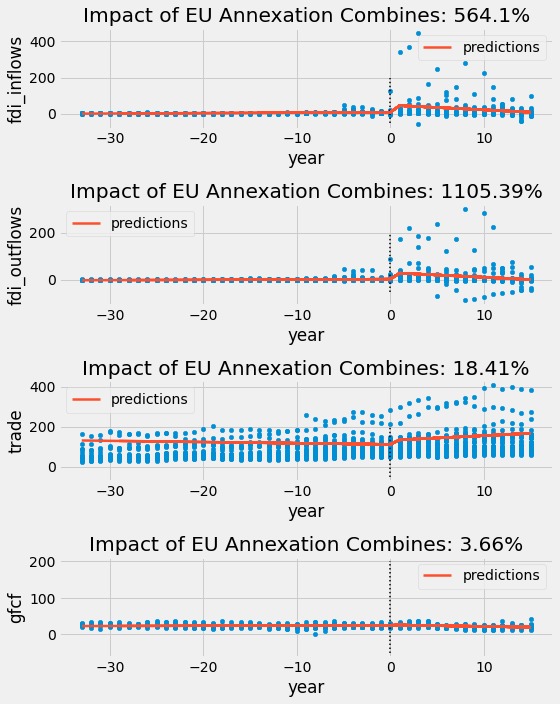

In [ ]:
# We use the same commands as the country-specific graphs
# Then, we plot the effect joining the EU on FDI flows, trade, and GFCF for alll countries
plt.figure(figsize=(8,10))

for p, variable in enumerate(["fdi_inflows", "fdi_outflows", "trade", "gfcf"], 1):
    ax = plt.subplot(4,1,p)
    wbdata.plot.scatter(x="year", y=variable, ax=ax, sharey = False)
    m = smf.wls(f"{variable}~year*threshold", rdd_combined).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    wbdata.assign(predictions=m.fittedvalues).plot(x="year", y="predictions", ax=ax, color="C1", linewidth=2.5)
    plt.title(f"Impact of EU Annexation Combines: {np.round(ate_pct, 2)}%")
    ax.vlines(x=0, ymin=-50, ymax=200, color='black', ls= ':', lw=1.5)

plt.tight_layout()

The RDD regression estimates and plots on the aggregated data of all countries joining the EU in 2004 tell us the following:

*   FDI inflows increase by 39.7049 percentage points at the threshold. We consider the effect to be statistically significant at the 1% significance level. The RDD plots tell us that joining the EU increases FDI inflows by 564.1%.
*   FDI outflows increase by 27.5726 percentage points at the threshold. As the P-value of the estimate is 0.002, we consider the effect to be statistically significant at the 1% significance level. The RDD plots tell us that joining the EU increases FDI outflows by 1105.39%.
* Trade decreases by 20.4248 percentage points at the threshold. As the P-value is 0.038, the estimate is statistically significant at the 5% significance level. The RDD plots tell us that joining the EU decreases trade by 18.41%.
* GFCF increases by	0.9192 percentage points at the threshold. The P-value of the estimate is 0.302, it is not statistically significant. The RDD plots tell us that joining the EU increases GFCF by 3.66%.




The results of most import are those pertaining to FDI inflows and outflows. For both FDI flows, the estimated treatment effect is both highly statistically significant as well as significant in the magnitude of the effect. Trade is as well statistically significant and relatively large in magnitude. These results could be primarily driven by the data of Cyprus and Malta. Given our individual RDD analysis of each country, we cannot claim that this aggregate trend is representative of any countries' experience upon joining the EU in 2004, aside from Cyprus and Malta.

## Sensitivity Analysis


We will have two approaches to our sensitivity analysis. First, we will recalculate our RDD estimates using a [user-written Python package **rdd**](https://github.com/evan-magnusson/rdd). Second, we will validate our results using a placebo test (choosing an arbitrary threshold).

Our RDD results showed that Cyprus experienced the largest treatment effects from joining the EU (within the framework of our analysis) and heavily affected the aggregate estimates. Hence, we will be focusing th sensitivity analysis on the estimates given by Cyprus for each of the variables of interest.

We first need to install the user-written package **rdd**. Using the methods from above (both in country-specific and aggregate analysis), it is somewhat difficult to adjust the regressions for parameters that are typically adjusted for RDD analyses. Utilizing this package allows us to calculate the (Imbens-Kalyanaraman) optimal bandwidth around the cut-off threshold (ideal for lessening bias from observations to far from the cutoff), and perform basic estimator and model criterion tests (more on these below).

In [ ]:
# We need to install and import the rdd package
pip install rdd
from rdd import rdd



---

**FDI Inflows (% of GDP)**

First, we want to choose a bandwidth that will allow us to study the observations closest to the threshold in order to reduce bias from observations too far from the threshold. We find this bandwidth (called the optimal "bandwidth") below, using our running variable **year** and the outcome variable as FDI inflows. We can keep our threshold as zero, since our running variable is still centralized around 2004.

In [ ]:
# We manually set our threshold as zero
threshold = 0
# Calculate the optimal bandwidth around the threshold
bandwidth_opt = rdd.optimal_bandwidth(wbdata[wbdata['country'] == 'Cyprus']['fdi_inflows'], wbdata[wbdata['country'] == 'Cyprus']['year'], cut=threshold)
print("Optimal bandwidth:", bandwidth_opt)

Optimal bandwidth: 10.083680247869278


Then using the optimal bandwidth, we run an rdd regression using the new command given by the package **rdd**, by restricting the dataset to only include observations within the optimal bandwidth.

In [ ]:
# Create the truncated data set with observations only within the optimal bandwidth
data_rdd= rdd.truncated_data(wbdata[wbdata['country'] == 'Cyprus'], 'year', bandwidth_opt, cut=threshold)

In [ ]:
# Fit the new model using the rdd package for FDI inflows
model = rdd.rdd(data_rdd, 'year', 'fdi_inflows', cut=threshold)
print(model.fit().summary())

Estimation Equation:	 fdi_inflows ~ TREATED + year
                            WLS Regression Results                            
Dep. Variable:            fdi_inflows   R-squared:                       0.576
Model:                            WLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     12.24
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           0.000440
Time:                        19:45:08   Log-Likelihood:                -114.97
No. Observations:                  21   AIC:                             235.9
Df Residuals:                      18   BIC:                             239.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

Interestingly, if we focus only on Cyprus, we see that the estimate for the treatment effect on FDI inflows is both largely negative and statistically insignificant, which is precisely the opposite from the RDD estimate we derived in our first analysis. The model P-value of the F-statistic is very low (0.0004), and hence statistically significant, and the adjusted R-squared is significantly large (0.529). Thus this could serve as a good enough model to find the effect of joining the EU on Cyprus's FDI inflows under our analysis and assumptions.

We will repeat the above steps to find the estimated treatment effect of joining the UN on FDI outflows, trade, and GFCF.



---
**FDI Outflows (% of GDP)**


We repeat the above for FDI outflows.

In [ ]:
bandwidth_opt1 = rdd.optimal_bandwidth(wbdata[wbdata['country'] == 'Cyprus']['fdi_outflows'], wbdata[wbdata['country'] == 'Cyprus']['year'], cut=threshold)
print("Optimal bandwidth:", bandwidth_opt1)

Optimal bandwidth: 9.663064764272695


In [ ]:
data_rdd_2004_2 = rdd.truncated_data(wbdata[wbdata['country'] == 'Cyprus'], 'year', bandwidth_opt1, cut=threshold)

model2_combined = rdd.rdd(data_rdd_2004_2, 'year', 'fdi_outflows', cut=threshold)
print(model2_combined.fit().summary())

Estimation Equation:	 fdi_outflows ~ TREATED + year
                            WLS Regression Results                            
Dep. Variable:           fdi_outflows   R-squared:                       0.035
Model:                            WLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.257
Date:                Fri, 29 Jan 2021   Prob (F-statistic):             0.0153
Time:                        13:33:24   Log-Likelihood:                -1261.3
No. Observations:                 241   AIC:                             2529.
Df Residuals:                     238   BIC:                             2539.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


Like with our first analysis of FDI outflows in Cyprus, the estimated treatment effect is significantly large and statistically significant at the 10% level. Although it is less statistically significant (compared to 1% from our first analysis) and substantially smaller (22.3799 compared to 88.0437 from the first anlaysis). The P-value of the F-statistic, at 0.01, is only statistically significant at the 5% significance level, and the adjusted R-squared is very low (at 0.026). This model would not likely give a precise or unbiased estimated treatment effect, and would have to be altered.



---

**Trade (% of GDP)**

We repeat the above for trade.

In [ ]:
bandwidth_opt2 = rdd.optimal_bandwidth(wbdata[wbdata['country'] == 'Cyprus']['trade'], wbdata[wbdata['country'] == 'Cyprus']['year'], cut=threshold)
print("Optimal bandwidth:", bandwidth_opt2)

Optimal bandwidth: 9.779033795925171


In [ ]:
data_rdd_2004_3 = rdd.truncated_data(wbdata[wbdata['country'] == 'Cyprus'], 'year', bandwidth_opt2, cut=threshold)

model3_combined = rdd.rdd(data_rdd_2004_3, 'year', 'trade', cut=threshold)
print(model3_combined.fit().summary())

Estimation Equation:	 trade ~ TREATED + year
                            WLS Regression Results                            
Dep. Variable:                  trade   R-squared:                       0.756
Model:                            WLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     24.82
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           1.24e-05
Time:                        19:48:18   Log-Likelihood:                -60.751
No. Observations:                  19   AIC:                             127.5
Df Residuals:                      16   BIC:                             130.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interce

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


Similarly to our first analysis of trade changes in Cyprus, the estimated treatment effect is significantly large and statistically significant at the 10% level. Although it is less statistically significant (compared to 1% from our first analysis) and almost halved in magnitude (-12.5267 compared to -29.0560 from the first analysis). The P-value of the F-statistic is 0, such that the model is highly statistically significant, and the adjusted R-squared very high at 0.726. Thus this could serve as a good enough model to find the effect of joining the EU on Cyprus's trade under our analysis and assumptions.



---

**GFCF (% of GDP)**

In [ ]:
bandwidth_opt3 = rdd.optimal_bandwidth(wbdata[wbdata['country'] == 'Cyprus']['gfcf'], wbdata[wbdata['country'] == 'Cyprus']['year'], cut=threshold)
print("Optimal bandwidth:", bandwidth_opt3)

Optimal bandwidth: 8.42467178344245


In [ ]:
data_rdd_2004_4 = rdd.truncated_data(wbdata[wbdata['country'] == 'Cyprus'], 'year', bandwidth_opt3, cut=threshold)

model4_combined = rdd.rdd(data_rdd_2004_4, 'year', 'gfcf', cut=threshold)
print(model4_combined.fit().summary())

Estimation Equation:	 gfcf ~ TREATED + year
                            WLS Regression Results                            
Dep. Variable:                   gfcf   R-squared:                       0.283
Model:                            WLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     2.761
Date:                Fri, 29 Jan 2021   Prob (F-statistic):             0.0975
Time:                        19:48:46   Log-Likelihood:                -39.059
No. Observations:                  17   AIC:                             84.12
Df Residuals:                      14   BIC:                             86.62
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


The estimated treatment effect presented here is the most like that presented in our first analysis. The effect is significantly large and statistically significant at the 5% level. It is actually both larger in magnitude and more statistically significant than the estimated treatment effect found previously (5.9556 compared to 4.4125 from the first analysis, and 5% compared to 10%). The P-value of the F-statistic, at 0.097, is only statistically significant at the 10% significance level, but the adjusted R-squared is not so low as to cause concern (at 0.180). This model would likely need to be altered to give a more precise or unbiased estimate, although it does serve its purpose to tell us of the general direction of the estimated treatment effect.



---

**Testing the Placebos**

In addition, we can check if our results are robusts using a placebo threshold. We will repeat our analysis from above, utilizing data exclusively from Cyprus, using a fake threshold. Since the threshold is arbitrarily chosen, there should be a continuity in the data at this false threshold, and the estimated treatment effect should be statistically insignificant.

We will place the threshold at -5 (the year 1999), as placing the threshold after 2004 risks the analysis being tainted by the effects of the financial crisis. We create new data that is now centralized at -5 instead of 0, in the same manner as we created the restricted datasets above.

In [ ]:
data_placebo = rdd.truncated_data(wbdata[wbdata['country'] == 'Cyprus'], 'year', yname='fdi_inflows', cut=-5)
data_placebo1 = rdd.truncated_data(wbdata[wbdata['country'] == 'Cyprus'], 'year', yname='fdi_outflows', cut=-5)
data_placebo2 = rdd.truncated_data(wbdata[wbdata['country'] == 'Cyprus'], 'year', yname='trade', cut=-5)
data_placebo3 = rdd.truncated_data(wbdata[wbdata['country'] == 'Cyprus'], 'year', yname='gfcf', cut=-5)

In [ ]:
model = rdd.rdd(data_placebo, 'year', 'fdi_inflows', cut=-5)
print(model.fit().summary())

Estimation Equation:	 fdi_inflows ~ TREATED + year
                            WLS Regression Results                            
Dep. Variable:            fdi_inflows   R-squared:                       0.393
Model:                            WLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     7.123
Date:                Fri, 29 Jan 2021   Prob (F-statistic):            0.00412
Time:                        20:50:33   Log-Likelihood:                -130.63
No. Observations:                  25   AIC:                             267.3
Df Residuals:                      22   BIC:                             270.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

In [ ]:
model = rdd.rdd(data_placebo1, 'year', 'fdi_outflows', cut=-5)
print(model.fit().summary())

Estimation Equation:	 fdi_outflows ~ TREATED + year
                            WLS Regression Results                            
Dep. Variable:           fdi_outflows   R-squared:                       0.337
Model:                            WLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     5.083
Date:                Fri, 29 Jan 2021   Prob (F-statistic):             0.0164
Time:                        20:50:40   Log-Likelihood:                -119.43
No. Observations:                  23   AIC:                             244.9
Df Residuals:                      20   BIC:                             248.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [ ]:
model = rdd.rdd(data_placebo2, 'year', 'trade', cut=-5)
print(model.fit().summary())

Estimation Equation:	 trade ~ TREATED + year
                            WLS Regression Results                            
Dep. Variable:                  trade   R-squared:                       0.036
Model:                            WLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.4465
Date:                Fri, 29 Jan 2021   Prob (F-statistic):              0.645
Time:                        20:52:56   Log-Likelihood:                -109.18
No. Observations:                  27   AIC:                             224.4
Df Residuals:                      24   BIC:                             228.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interce

In [ ]:
model = rdd.rdd(data_placebo3, 'year', 'gfcf', cut=-3)
print(model.fit().summary())

Estimation Equation:	 gfcf ~ TREATED + year
                            WLS Regression Results                            
Dep. Variable:                   gfcf   R-squared:                       0.362
Model:                            WLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     2.839
Date:                Fri, 29 Jan 2021   Prob (F-statistic):              0.106
Time:                        20:50:52   Log-Likelihood:                -23.752
No. Observations:                  13   AIC:                             53.50
Df Residuals:                      10   BIC:                             55.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


For each of the four regressions, we can see that the estimated treatment effect is statistically insignificant. Therefore, the threshold occuring at 0 (at the year 2004) is significant in the effect is has on FDI inflows, FDI outflows, trade, and GFCF.

### Discussion and Conclusion


The results we derived from the sensitivity analysis, both from the application of the **rdd** package to the use of placebo thresholds, tells us that at least in the case of Cyprus, joining the EU in 2004 led to statistically significant increases in FDI outflows, decreases in trade, and increases in GFCF. We can reasonably extrapolate, using our analysis of Malta, that this will be the case for it as well.

There are caveats to our approach that must be mentioned and considered in future research. Those caveats appear in the form of inconsistent results within the analytical framework of our paper across all the countries that joined the EU in 2004, even if the majority of the estimated treatment effects were statistically significant. Of first priority is the frequency of the data we used. Our FDI inflows, FDI outflows, trade, and GFCF data was measured in yearly intervals, as quarterly data was not publicly available. So although the data was highly reliable, it would have improved the precision of the estimators should it have been recorded quarterly, monthly, or weekly.

As stated previously, future research could still exploit the sharp discontinuity which occurs due to joining the EU, and perform an RDD analysis on groups of countries with similar economy makeup, productive capacity, and main areas of foreign investment which joined the EU at the same time. Clear patterns of estimated treatment effects could be more easily attained doing so (or perhaps, a clearer answers as to how joining the EU affects such investment and trade indicators). In addition, it would be well advised for future research to utilize high-frequency data on foreign investment, perhaps from sources which are not publicly available, or utilize alternative measures of foreign investment which are recorded on a quarterly, monthly, or weekly basis.

